In [23]:
import pandas as pd

seeds_df = pd.read_csv('seeds-less-rows_f1.csv')
seeds_df.head()

,src_ip,src_port,dest_ip,dest_port,proto,pktTotalCount,flowDuration,label1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,V
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,V
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,V
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,V
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,V


In [24]:
pd.unique(seeds_df['label1'])


array(['V', 'N'], dtype=object)

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [26]:
seeds_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   src_ip         28 non-null     float64
 1   src_port       28 non-null     float64
 2   dest_ip        28 non-null     float64
 3   dest_port      28 non-null     float64
 4   proto          28 non-null     float64
 5   pktTotalCount  28 non-null     float64
 6   flowDuration   28 non-null     float64
 7   label1         28 non-null     object 
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [27]:
# remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('label1'))

# extract the measurements as a NumPy array
samples = seeds_df.values
samples.shape

(28, 7)

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [62]:
plt.rcParams['figure.figsize'] = (25, 15)
plt.style.use('ggplot')

In [63]:
mergings = linkage(samples, method='complete')


In [76]:
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=0,
           leaf_font_size=12,
           color_threshold = 6,
           pltitle = 'My title',
xlabel = 'categories',
ylabel = 'values'
           
)
plt.show()

TypeError: dendrogram() got an unexpected keyword argument 'title'

In [42]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(samples)

In [43]:
y_hc.shape


(28,)

In [44]:
y_hc


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

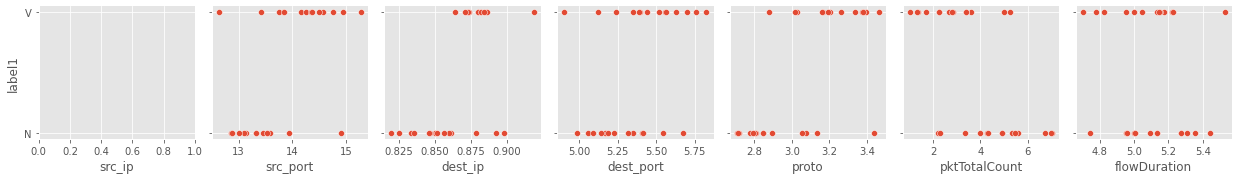

In [45]:
import seaborn as sns

seeds_df = pd.read_csv('seeds-less-rows_f1.csv')
sns.pairplot(seeds_df.iloc[:,:],x_vars=seeds_df.columns[:-1], y_vars='label1')
plt.show()